<a href="https://colab.research.google.com/github/PGaea/Butardo_DAF/blob/main/StudentsPerformance_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PGaea/Butardo_DAF/refs/heads/main/StudentsPerformance1.csv')

In [ ]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
df['test preparation course'] = df['test preparation course'].astype(str).map({'none': 0, 'completed': 1}).fillna(0).astype(int)

In [ ]:
x = df[['test preparation course']]
y = df['math score']

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
print(f"\nIntercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁): {model.coef_[0]}")


Intercept (β₀): 64.0778816199377
Coefficient (β₁): 5.6176491063192895


In [ ]:
y_pred = model.predict(x)

In [ ]:
print("Predicted Math Score: ", y_pred)

Predicted Math Score:  [64.07788162 69.69553073 64.07788162 64.07788162 64.07788162 64.07788162
 69.69553073 64.07788162 69.69553073 64.07788162 64.07788162 64.07788162
 64.07788162 69.69553073 64.07788162 64.07788162 64.07788162 64.07788162
 69.69553073 64.07788162 64.07788162 69.69553073 64.07788162 64.07788162
 69.69553073 64.07788162 64.07788162 64.07788162 64.07788162 64.07788162
 64.07788162 64.07788162 64.07788162 64.07788162 64.07788162 69.69553073
 64.07788162 64.07788162 69.69553073 64.07788162 64.07788162 64.07788162
 64.07788162 69.69553073 64.07788162 64.07788162 69.69553073 64.07788162
 69.69553073 69.69553073 64.07788162 69.69553073 64.07788162 64.07788162
 69.69553073 64.07788162 69.69553073 64.07788162 69.69553073 64.07788162
 69.69553073 64.07788162 64.07788162 64.07788162 64.07788162 64.07788162
 64.07788162 64.07788162 64.07788162 64.07788162 69.69553073 69.69553073
 64.07788162 64.07788162 64.07788162 64.07788162 64.07788162 69.69553073
 69.69553073 64.07788162 64.

In [ ]:
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()

In [ ]:
print(f"Model Summary (using statsmodels): {ols_model.summary()}")

Model Summary (using statsmodels):                             OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     32.54
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.54e-08
Time:                        12:36:03   Log-Likelihood:                -4121.3
No. Observations:                1000   AIC:                             8247.
Df Residuals:                     998   BIC:                             8256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

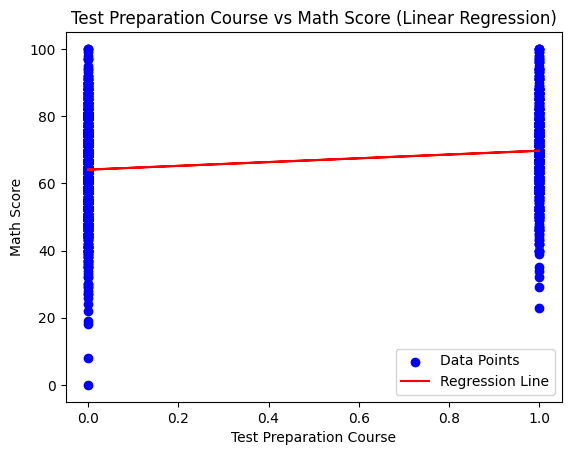

In [ ]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title("Test Preparation Course vs Math Score (Linear Regression)")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.legend()
plt.show()

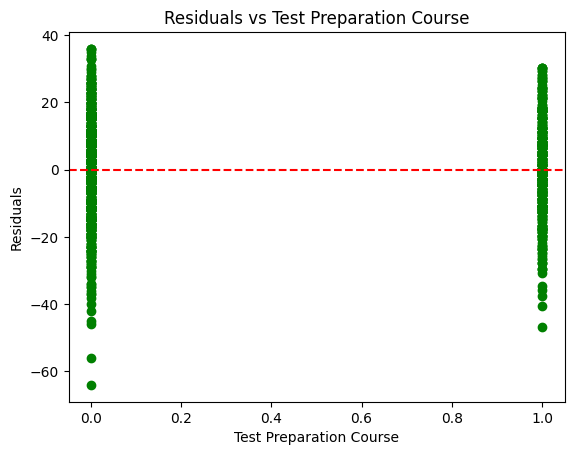

In [ ]:
residuals = y - y_pred
plt.scatter(x, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Residuals")
plt.show()

In [ ]:
print(f"\nMaximum predicted Math Score: {y_pred.max()}")
print(f"Minimum predicted Math Score: {y_pred.min()}")


Maximum predicted Math Score: 69.69553072625699
Minimum predicted Math Score: 64.0778816199377
